# Phase 1 Project

**Authors:** Jonathan Holt
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Microsoft sees all the big companies creating original video content and they want to get in on the fun. They have decided to create a new movie studio, but they don’t know anything about creating movies. You are charged with exploring what types of films are currently doing the best at the box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

## Data Preparation
Describe and justify the process for preparing the data for analysis.

Questions to consider:

Were there variables you dropped or created?
How did you address missing values or outliers?
Why are these choices appropriate given the data and the business problem?


In [1]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn') #style that I am using for my visualizations
import seaborn as sns

%matplotlib inline

In [2]:
# Here you run your code to explore the data
import glob, os
fpath = 'zippedData/'
os.listdir(fpath)

['imdb.title.crew.csv.gz',
 'tmdb.movies.csv.gz',
 'imdb.title.akas.csv.gz',
 'imdb.title.ratings.csv.gz',
 'imdb.name.basics.csv.gz',
 'rt.reviews.tsv.gz',
 'imdb.title.basics.csv.gz',
 'rt.movie_info.tsv.gz',
 'tn.movie_budgets.csv.gz',
 'bom.movie_gross.csv.gz',
 'imdb.title.principals.csv.gz']

In [3]:
query = fpath+"*.gz"

file_list=glob.glob(query)
file_list

['zippedData/imdb.title.crew.csv.gz',
 'zippedData/tmdb.movies.csv.gz',
 'zippedData/imdb.title.akas.csv.gz',
 'zippedData/imdb.title.ratings.csv.gz',
 'zippedData/imdb.name.basics.csv.gz',
 'zippedData/rt.reviews.tsv.gz',
 'zippedData/imdb.title.basics.csv.gz',
 'zippedData/rt.movie_info.tsv.gz',
 'zippedData/tn.movie_budgets.csv.gz',
 'zippedData/bom.movie_gross.csv.gz',
 'zippedData/imdb.title.principals.csv.gz']

In [4]:
tables = {}

for file in file_list:
    print('---'*20)
    file_name = file.replace('zippedData/', '').replace('.', '_')
    print(file_name)
    
    
    
    if 'tsv.gz' in file:
        temp_df = pd.read_csv(file, sep= "\t", encoding = "latin-1")
    else:
        temp_df = pd.read_csv(file)
    
    display(temp_df.head(), temp_df.tail())
    tables[file_name] = temp_df 

------------------------------------------------------------
imdb_title_crew_csv_gz


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


,tconst,directors,writers
146139,tt8999974,nm10122357,nm10122357
146140,tt9001390,nm6711477,nm6711477
146141,tt9001494,"nm10123242,nm10123248",NaN
146142,tt9004986,nm4993825,nm4993825
146143,tt9010172,NaN,nm8352242


------------------------------------------------------------
tmdb_movies_csv_gz


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.6,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.6,2018-06-22,Trailer Made,0.0,1
26516,26516,"[53, 27]",309885,en,The Church,0.6,2018-10-05,The Church,0.0,1


------------------------------------------------------------
imdb_title_akas_csv_gz


,title_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


,title_id,ordering,title,region,language,types,attributes,is_original_title
331698,tt9827784,2,Sayonara kuchibiru,NaN,NaN,original,NaN,1.0
331699,tt9827784,3,Farewell Song,XWW,en,imdbDisplay,NaN,0.0
331700,tt9880178,1,La atención,NaN,NaN,original,NaN,1.0
331701,tt9880178,2,La atención,ES,NaN,NaN,NaN,0.0
331702,tt9880178,3,The Attention,XWW,en,imdbDisplay,NaN,0.0


------------------------------------------------------------
imdb_title_ratings_csv_gz


,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


------------------------------------------------------------
imdb_name_basics_csv_gz


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer","tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department","tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer","tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department","tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator","tt0452644,tt0452692,tt3458030,tt2178256"


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
606643,nm9990381,Susan Grobes,NaN,NaN,actress,NaN
606644,nm9990690,Joo Yeon So,NaN,NaN,actress,"tt9090932,tt8737130"
606645,nm9991320,Madeline Smith,NaN,NaN,actress,"tt8734436,tt9615610"
606646,nm9991786,Michelle Modigliani,NaN,NaN,producer,NaN
606647,nm9993380,Pegasus Envoyé,NaN,NaN,"director,actor,writer",tt8743182


------------------------------------------------------------
rt_reviews_tsv_gz


,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


,id,review,rating,fresh,critic,top_critic,publisher,date
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"
54431,2000,NaN,3/5,fresh,Nicolas Lacroix,0,Showbizz.net,"November 12, 2002"


------------------------------------------------------------
imdb_title_basics_csv_gz


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


------------------------------------------------------------
rt_movie_info_tsv_gz


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN
1559,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures


------------------------------------------------------------
tn_movie_budgets_csv_gz


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0
5781,82,"Aug 5, 2005",My Date With Drew,"$1,100","$181,041","$181,041"


------------------------------------------------------------
bom_movie_gross_csv_gz


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


------------------------------------------------------------
imdb_title_principals_csv_gz


,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


,tconst,ordering,nconst,category,job,characters
1028181,tt9692684,1,nm0186469,actor,NaN,"[""Ebenezer Scrooge""]"
1028182,tt9692684,2,nm4929530,self,NaN,"[""Herself"",""Regan""]"
1028183,tt9692684,3,nm10441594,director,NaN,NaN
1028184,tt9692684,4,nm6009913,writer,writer,NaN
1028185,tt9692684,5,nm10441595,producer,producer,NaN


### Formating Cell
I am keeping all of my display commands here so I can easily find them if/when I need
to change anything.

In [5]:
pd.set_option('display.max_rows', 1000)
#change the amount of rows displayed
pd.options.display.float_format = '{:,.0f}'.format 
#This takes the decimal places out of floats. I may need to change this for some of the other features.

In [6]:
#sorting by worldwide gross
tables['tn_movie_budgets_csv_gz'].sort_values(by='worldwide_gross', ascending=False).head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
3737,38,"Aug 21, 2009",Fifty Dead Men Walking,"$10,000,000",$0,"$997,921"
3432,33,"Sep 30, 2005",Duma,"$12,000,000","$870,067","$994,790"
5062,63,"Apr 1, 2011",Insidious,"$1,500,000","$54,009,150","$99,870,886"
883,84,"Apr 2, 2004",Hellboy,"$60,000,000","$59,623,958","$99,823,958"
5613,14,"Mar 21, 1980",Mad Max,"$200,000","$8,750,000","$99,750,000"


Something is wrong here. I assume that it is sorting anything with a '9' in the front first.
I presume that the dollar amounts are strings instead of integers. I should also check for
null values while I'm checking for this.

### Table Aliases
Setting an alias for each table so that it is easier to use them.

In [7]:
table1 = tables['imdb_title_crew_csv_gz']
table2 = tables['tmdb_movies_csv_gz']
table3 = tables['imdb_title_akas_csv_gz']
table4 = tables['imdb_title_ratings_csv_gz']
table5 = tables['imdb_name_basics_csv_gz']
table6 = tables['rt_reviews_tsv_gz']
table7 = tables['imdb_title_basics_csv_gz']
table8 = tables['rt_movie_info_tsv_gz']
table9 = tables['tn_movie_budgets_csv_gz']
table10 = tables['bom_movie_gross_csv_gz']
table11 = tables['imdb_title_principals_csv_gz']

In [8]:
table9.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Data Cleaning

Sure enough, everything is a string except for the ID field. I will convert all of the financial information
to floats and while I'm at it. I will also convert the release date field to date/time.

In [9]:
table9.isna().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

There are no null values, but there are likely placeholders

I will now clean the three financial columns. Removing the $, removing the comma, then converting to float.

In [10]:
cleaned_budget = table9['production_budget'].map(lambda x: x.replace('$',' '))
cleaned_budget = cleaned_budget.map(lambda x: x.replace(',',''))
cleaned_budget = cleaned_budget.astype(float)

cleaned_domestic = table9['domestic_gross'].map(lambda x: x.replace('$',' '))
cleaned_domestic =cleaned_domestic.map(lambda x: x.replace(',',''))
cleaned_domestic = cleaned_domestic.astype(float)

cleaned_worldwide = table9['worldwide_gross'].map(lambda x: x.replace('$',' '))
cleaned_worldwide = cleaned_worldwide.map(lambda x: x.replace(',',''))
cleaned_worldwide = cleaned_worldwide.astype(float)

In [11]:
#Putting my cleaned data into the table.
table9["production_budget"] = cleaned_budget
table9["domestic_gross"] = cleaned_domestic
table9["worldwide_gross"] = cleaned_worldwide
table9.head(3)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"350,000,000","42,762,350","149,762,350"


In [12]:
table9.sort_values(by='worldwide_gross', ascending=False).head(5)


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"425,000,000","760,507,625","2,776,345,279"
42,43,"Dec 19, 1997",Titanic,"200,000,000","659,363,944","2,208,208,395"
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220"
6,7,"Apr 27, 2018",Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200"
33,34,"Jun 12, 2015",Jurassic World,"215,000,000","652,270,625","1,648,854,864"


I now have the data cleaned and sorted the way that I wanted.

In [13]:
#converting release_date to datetime format.
cleaned_release_date = pd.to_datetime(table9['release_date'])
table9['release_date']= cleaned_release_date
table9.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875"
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350"


In [14]:
#what is the range of release dates in this data set?
print("Earliest release date:")
print(table9['release_date'].min())

print("Latest release date:")
print(table9['release_date'].max())

Earliest release date:
1915-02-08 00:00:00
Latest release date:
2020-12-31 00:00:00


In [15]:
table9.sort_values(by='release_date', ascending=False).head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
194,95,2020-12-31,Moonfall,"150,000,000",0,0
1205,6,2020-12-31,Hannibal the Conqueror,"50,000,000",0,0
535,36,2020-02-21,Call of the Wild,"82,000,000",0,0


There are several movies that have budget information, but no gross. Presumably, this is because they hadn't
been released at the time that this data was collected. 

Creating a column 'release_year' to more easily search general release dates, etc.

In [16]:
table9['release_year'] = table9['release_date'].dt.year

In [17]:
table9.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",2011


The bulk of the data starts in 1996 where there are 100+ movies every year afterward until 2018. There is a little bit of info for 2019.

In [18]:
#sorting by release year
table9.sort_values(by='release_year', ascending=False).head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
194,95,2020-12-31,Moonfall,"150,000,000",0,0,2020
535,36,2020-02-21,Call of the Wild,"82,000,000",0,0,2020
1205,6,2020-12-31,Hannibal the Conqueror,"50,000,000",0,0,2020


In [19]:
table9.sort_values(by='worldwide_gross', ascending=False).head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009
42,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015


In [20]:
#creating a column that calculates the profit for each movie. (gross - budget)
total_profit = table9.apply(lambda x: x['worldwide_gross'] - x['production_budget'], axis=1)
table9['total_profit'] = total_profit
table9.sort_values(by='total_profit', ascending=False).head(5)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279"
42,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395"
6,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200"
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220"
33,34,2015-06-12,Jurassic World,"215,000,000","652,270,625","1,648,854,864",2015,"1,433,854,864"


What is the return on investment for these movies?

In [21]:
roi = table9.apply(lambda x: x['total_profit'] / x['production_budget'], axis=1)
table9['ROI'] = roi
table9.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",2011,"635,063,875",2


In [22]:
#A quick snapshot of the information. 
table9.describe()

,id,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI
count,"5,782","5,782","5,782","5,782","5,782","5,782","5,782"
mean,50,"31,587,757","41,873,327","91,487,461","2,004","59,899,704",4
std,29,"41,812,077","68,240,597","174,719,969",13,"146,088,881",30
min,1,"1,100",0,0,"1,915","-200,237,650",-1
25%,25,"5,000,000","1,429,534","4,125,415","2,000","-2,189,071",-1
50%,50,"17,000,000","17,225,945","27,984,448","2,007","8,550,286",1
75%,75,"40,000,000","52,348,662","97,645,836","2,012","60,968,502",3
max,100,"425,000,000","936,662,225","2,776,345,279","2,020","2,351,345,279","1,799"


I am happy with where my financial data is at the moment, even though it will likely need further refinement. Now I want to find a way to indentify the **genres** of these movies as that will help me answer the specific question of what ***types*** **of movies should be made.**

After this, I plan on investigating review scores, giving me **financials, review scores, and genres to work with.**

In [23]:
table7.head(2)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114,"Biography,Drama"


Table 7 (IMDB Basics) seems to be the best place to get my genres.

In [24]:
table7.sort_values(by='start_year', ascending=True).head(10)


,tconst,primary_title,original_title,start_year,runtime_minutes,genres
9599,tt1566491,Brainiacs in La La Land,Brainiacs in La La Land,2010,nan,Comedy
43264,tt2578092,Fireplace for your Home: Crackling Fireplace w...,Fireplace for your Home: Crackling Fireplace w...,2010,61,Music
11550,tt1634300,Role/Play,Role/Play,2010,85,"Drama,Romance"
11551,tt1634332,Johan1,Johan Primero,2010,78,"Comedy,Drama,Romance"
11552,tt1634334,Hands Up,Les mains en l'air,2010,90,Drama
11553,tt1634337,Que devient mon souvenir quand tu n'y penses pas,Que devient mon souvenir quand tu n'y penses pas,2010,45,Documentary
11554,tt1634519,The Black Eyed Peas: The E.N.D. World Tour Live,The Black Eyed Peas: The E.N.D. World Tour Live,2010,nan,"Documentary,Music"
11555,tt1634524,Jitters,Órói,2010,93,"Drama,Romance"
11556,tt1634540,Rescue Men: The Story of the Pea Island Lifesa...,Rescue Men: The Story of the Pea Island Lifesa...,2010,90,Documentary
11557,tt1634554,Janakan,Janakan,2010,150,"Crime,Thriller"


This data only goes back to 2010. This will still be useful as Microsoft will want current information on
which genres are popular.

In [25]:
#I am going to merge several of the IMDB datasets together, using the tconst as a key.
imdb_df = pd.merge(table1, table4, left_on= 'tconst', right_on= 'tconst')
imdb_df= pd.merge(imdb_df, table7, left_on= 'tconst', right_on= 'tconst')
imdb_df= pd.merge(imdb_df, table11, left_on= 'tconst', right_on= 'tconst')
imdb_df.head(5)

,tconst,directors,writers,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,nconst,category,job,characters
0,tt0285252,nm0899854,nm0899854,4,219,Life's a Beach,Life's a Beach,2012,100,Comedy,10,nm1077681,composer,NaN,NaN
1,tt0285252,nm0899854,nm0899854,4,219,Life's a Beach,Life's a Beach,2012,100,Comedy,1,nm0960950,actor,NaN,"[""Darren Fields""]"
2,tt0285252,nm0899854,nm0899854,4,219,Life's a Beach,Life's a Beach,2012,100,Comedy,2,nm0461311,actor,NaN,"[""RJ""]"
3,tt0285252,nm0899854,nm0899854,4,219,Life's a Beach,Life's a Beach,2012,100,Comedy,3,nm0000686,actor,NaN,"[""Roy Callahan""]"
4,tt0285252,nm0899854,nm0899854,4,219,Life's a Beach,Life's a Beach,2012,100,Comedy,4,nm0001822,actor,NaN,"[""Tom Wald""]"


There are a lot of duplicates due to the personnel attached to each movie getting their own record. I doubt that I will need to check the personnel, so let's drop the duplicates.

In [26]:
imdb_df = imdb_df.drop_duplicates('original_title', keep='first')
imdb_df.head(3)

,tconst,directors,writers,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,nconst,category,job,characters
0,tt0285252,nm0899854,nm0899854,4,219,Life's a Beach,Life's a Beach,2012,100,Comedy,10,nm1077681,composer,NaN,NaN
10,tt0462036,nm1940585,nm1940585,6,18,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110,Drama,10,nm0230187,production_designer,NaN,NaN
20,tt0835418,nm0151540,"nm0310087,nm0841532",5,8147,The Babymakers,The Babymakers,2012,95,Comedy,10,nm0790481,composer,NaN,NaN


In [27]:
imdb_df.sort_values('original_title').head(5)

,tconst,directors,writers,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,ordering,nconst,category,job,characters
3802,tt2346170,nm0950956,nm1880240,6,40,#1 Serial Killer,#1 Serial Killer,2013,87,Horror,10,nm0947510,editor,NaN,NaN
272939,tt3120962,nm5361948,nm5361948,7,6,#5,#5,2013,68,"Biography,Comedy,Fantasy",1,nm5361948,actor,NaN,"[""Ricky Bardy""]"
626374,tt5255986,nm1272505,"nm3227459,nm1272505",5,18,#66,#66,2015,116,Action,10,nm6348854,editor,NaN,NaN
618511,tt7853996,"nm8680614,nm8680613,nm0479471",NaN,8,21,#ALLMYMOVIES,#ALLMYMOVIES,2015,nan,Documentary,1,nm0479471,self,NaN,"[""Himself""]"
584307,tt9844890,nm1519998,nm10506373,7,8,#AbroHilo,#AbroHilo,2019,52,Documentary,1,nm5084084,self,NaN,"[""Himself""]"


In [28]:
imdb_df = imdb_df.drop(['directors', 'writers', 'ordering', 'nconst', 'category', 'job', 'characters'], axis = 1)
imdb_df.head(10)

,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0285252,4,219,Life's a Beach,Life's a Beach,2012,100,Comedy
10,tt0462036,6,18,Steve Phoenix: The Untold Story,Steve Phoenix: The Untold Story,2012,110,Drama
20,tt0835418,5,8147,The Babymakers,The Babymakers,2012,95,Comedy
30,tt0878654,6,875,Bulletface,Bulletface,2010,82,Thriller
40,tt0879859,7,21,Torn,Torn,2010,nan,Thriller
50,tt0996958,2,495,Legend of the Red Reaper,Legend of the Red Reaper,2013,99,"Action,Adventure,Fantasy"
60,tt0999913,6,30924,Straw Dogs,Straw Dogs,2011,110,"Action,Drama,Thriller"
70,tt10011102,8,55,The Sholay Girl,The Sholay Girl,2019,106,"Action,Biography,Drama"
80,tt1002965,8,31,Call of Life,Call of Life,2010,60,Documentary
90,tt10055770,8,380,Vellai Pookal,Vellaipookal,2019,122,Thriller


Dropped the columns that weren't useful. (can always get them back from the original sources) I dropped the following columns: *directors, writers, ordering, nconst, category, job, characters*.

### Merging the Dataframes

I want to now merge this imdb_df with my financial information from table9. I know that if I just do a merge on primary title, some of the results will be incorrect. (Avatar is the top grossing movie but is listed as a horror movie)


In [29]:
#inner join with the indiciator column so I can track where everything is coming from.
merged_originals = pd.merge(table9, imdb_df, left_on= 'movie', right_on= 'original_title', how='left', indicator=True)
merged_originals.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,_merge
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",2011,"635,063,875",2,tt1298650,7,"447,624",Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,"2,011",136,"Action,Adventure,Fantasy",both
2,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350",2019,"-200,237,650",-1,tt6565702,6,"24,451",Dark Phoenix,Dark Phoenix,"2,019",113,"Action,Adventure,Sci-Fi",both
3,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963",2015,"1,072,413,963",3,tt2395427,7,"665,594",Avengers: Age of Ultron,Avengers: Age of Ultron,"2,015",141,"Action,Adventure,Sci-Fi",both
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747",2017,"999,721,747",3,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only


In [30]:
merged_originals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 5781
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   float64       
 4   domestic_gross     5782 non-null   float64       
 5   worldwide_gross    5782 non-null   float64       
 6   release_year       5782 non-null   int64         
 7   total_profit       5782 non-null   float64       
 8   ROI                5782 non-null   float64       
 9   tconst             2123 non-null   object        
 10  averagerating      2123 non-null   float64       
 11  numvotes           2123 non-null   float64       
 12  primary_title      2123 non-null   object        
 13  original_title     2123 non-null   object        
 14  start_ye

 5782 records after the join.

I am going ot slice into two datasets. One that merged on original title, and everything else that still needs to merge.

In [31]:
correct_merge_df = merged_originals.loc[(merged_originals["_merge"] == "both")]
need_to_merge = merged_originals.loc[(merged_originals["_merge"] != "both")]


In [32]:
need_to_merge.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,_merge
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747",2017,"999,721,747",3,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only


In [33]:
correct_merge_df = correct_merge_df.drop(['_merge'], axis=1) #dropping '_merge' so I can continue

Locating Avatar and moving it to the correct_merge_df as I can tell from the release_year, and original_title that the horror movie Avatar is not the one that was the best grossing movie of all time.

In [34]:
avatar = merged_originals.loc[(merged_originals['movie'] == 'Avatar')]
correct_merge_df = correct_merge_df.append(avatar, ignore_index = True)

In [35]:
correct_merge_df.sort_values('total_profit', ascending=False).head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,_merge
2123,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
28,43,1997-12-19,Titanic,"200,000,000","659,363,944","2,208,208,395",1997,"2,008,208,395",10,tt2495766,6,20,Titanic,Titanic,"2,012",nan,Adventure,NaN
3,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,8,"670,926",Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",NaN


In [36]:
#need to drop the indicator column if I want to use it again.
need_to_merge = need_to_merge.drop(['_merge'], axis=1)
need_to_merge.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,1,2009-12-18,Avatar,"425,000,000","760,507,625","2,776,345,279",2009,"2,351,345,279",6,NaN,nan,nan,NaN,NaN,nan,nan,NaN
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747",2017,"999,721,747",3,NaN,nan,nan,NaN,NaN,nan,nan,NaN
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,nan,nan,NaN,NaN,nan,nan,NaN
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,"300,000,000","309,420,425","963,420,425",2007,"663,420,425",2,NaN,nan,nan,NaN,NaN,nan,nan,NaN
15,16,2007-05-04,Spider-Man 3,"258,000,000","336,530,303","894,860,230",2007,"636,860,230",2,NaN,nan,nan,NaN,NaN,nan,nan,NaN


In [37]:
#dropping Avatar as I know that it is not merging correctly.
need_to_merge = need_to_merge.drop(0)
need_to_merge.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747",2017,"999,721,747",3,NaN,nan,nan,NaN,NaN,nan,nan,NaN
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,nan,nan,NaN,NaN,nan,nan,NaN
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,"300,000,000","309,420,425","963,420,425",2007,"663,420,425",2,NaN,nan,nan,NaN,NaN,nan,nan,NaN


In [38]:
#now merging need_to_merge  with primary name.
merged_with_primary = pd.merge(need_to_merge, imdb_df, left_on= 'movie', right_on= 'primary_title', how='left', indicator=True)
merged_with_primary.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_x,...,genres_x,tconst_y,averagerating_y,numvotes_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,_merge
0,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747",2017,"999,721,747",3,NaN,...,NaN,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
1,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,...,NaN,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
2,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,"300,000,000","309,420,425","963,420,425",2007,"663,420,425",2,NaN,...,NaN,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
3,16,2007-05-04,Spider-Man 3,"258,000,000","336,530,303","894,860,230",2007,"636,860,230",2,NaN,...,NaN,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
4,20,2009-07-15,Harry Potter and the Half-Blood Prince,"250,000,000","302,089,278","935,213,767",2009,"685,213,767",3,NaN,...,NaN,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only


In [39]:
merged_with_primary = merged_with_primary.drop(merged_with_primary.columns[9:16], axis = 1)
merged_with_primary.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,genres_x,tconst_y,averagerating_y,numvotes_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,_merge
0,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747",2017,"999,721,747",3,NaN,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
1,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
2,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,"300,000,000","309,420,425","963,420,425",2007,"663,420,425",2,NaN,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only


In [40]:
merged_with_primary = merged_with_primary.drop(merged_with_primary.columns[9], axis = 1)
merged_with_primary.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_y,averagerating_y,numvotes_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,genres_y,_merge
0,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747",2017,"999,721,747",3,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
1,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only
2,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,"300,000,000","309,420,425","963,420,425",2007,"663,420,425",2,NaN,nan,nan,NaN,NaN,nan,nan,NaN,left_only


In [41]:
#dropping indicator column
merged_with_primary = merged_with_primary.drop(merged_with_primary.columns[16], axis = 1)
merged_with_primary.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_y,averagerating_y,numvotes_y,primary_title_y,original_title_y,start_year_y,runtime_minutes_y,_merge
0,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747",2017,"999,721,747",3,NaN,nan,nan,NaN,NaN,nan,nan,left_only
1,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,nan,nan,NaN,NaN,nan,nan,left_only
2,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,"300,000,000","309,420,425","963,420,425",2007,"663,420,425",2,NaN,nan,nan,NaN,NaN,nan,nan,left_only


In [42]:
#Renaming the columns which contain _y
merged_with_primary.rename(columns = {'averagerating_y':'averagerating', 'numvotes_y':'numvotes',
                              'primary_title_y':'primary_title', 'original_title_y':'original_title',
                              'start_year_y': 'start_year', 'runtime_minutes_y': 'runtime_minutes',
                              'genres_y' : 'genres'}, inplace = True)

In [43]:
merged_with_primary.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst_y,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,_merge
0,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"317,000,000","620,181,382","1,316,721,747",2017,"999,721,747",3,NaN,nan,nan,NaN,NaN,nan,nan,left_only
1,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,"306,000,000","936,662,225","2,053,311,220",2015,"1,747,311,220",6,NaN,nan,nan,NaN,NaN,nan,nan,left_only
2,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,"300,000,000","309,420,425","963,420,425",2007,"663,420,425",2,NaN,nan,nan,NaN,NaN,nan,nan,left_only


Appending "merged with primary" to correct merge to make project_df.

In [44]:
project_df =  correct_merge_df.append(merged_with_primary, ignore_index=True)
project_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,_merge,tconst_y
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",2011,"635,063,875",2,tt1298650,7,"447,624",Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,"2,011",136,"Action,Adventure,Fantasy",NaN,NaN
1,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350",2019,"-200,237,650",-1,tt6565702,6,"24,451",Dark Phoenix,Dark Phoenix,"2,019",113,"Action,Adventure,Sci-Fi",NaN,NaN
2,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963",2015,"1,072,413,963",3,tt2395427,7,"665,594",Avengers: Age of Ultron,Avengers: Age of Ultron,"2,015",141,"Action,Adventure,Sci-Fi",NaN,NaN
3,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,8,"670,926",Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi",NaN,NaN
4,9,2017-11-17,Justice League,"300,000,000","229,024,295","655,945,209",2017,"355,945,209",1,tt0974015,6,"329,135",Justice League,Justice League,"2,017",120,"Action,Adventure,Fantasy",NaN,NaN


In [45]:
#dropping the columns that I missed before.
project_df = project_df.drop(project_df[['_merge', 'tconst_y']], axis = 1)
project_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",2011,"635,063,875",2,tt1298650,7,"447,624",Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,"2,011",136,"Action,Adventure,Fantasy"
1,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350",2019,"-200,237,650",-1,tt6565702,6,"24,451",Dark Phoenix,Dark Phoenix,"2,019",113,"Action,Adventure,Sci-Fi"
2,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963",2015,"1,072,413,963",3,tt2395427,7,"665,594",Avengers: Age of Ultron,Avengers: Age of Ultron,"2,015",141,"Action,Adventure,Sci-Fi"
3,7,2018-04-27,Avengers: Infinity War,"300,000,000","678,815,482","2,048,134,200",2018,"1,748,134,200",6,tt4154756,8,"670,926",Avengers: Infinity War,Avengers: Infinity War,"2,018",149,"Action,Adventure,Sci-Fi"
4,9,2017-11-17,Justice League,"300,000,000","229,024,295","655,945,209",2017,"355,945,209",1,tt0974015,6,"329,135",Justice League,Justice League,"2,017",120,"Action,Adventure,Fantasy"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5792,76,2006-05-26,Cavite,"7,000","70,071","71,644",2006,"64,644",9,NaN,nan,nan,NaN,NaN,nan,nan,NaN
5793,77,2004-12-31,The Mongol King,"7,000",900,900,2004,"-6,100",-1,NaN,nan,nan,NaN,NaN,nan,nan,NaN
5794,79,1999-04-02,Following,"6,000","48,482","240,495",1999,"234,495",39,NaN,nan,nan,NaN,NaN,nan,nan,NaN
5795,80,2005-07-13,Return to the Land of Wonders,"5,000","1,338","1,338",2005,"-3,662",-1,NaN,nan,nan,NaN,NaN,nan,nan,NaN


In [46]:
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5797 non-null   int64         
 1   release_date       5797 non-null   datetime64[ns]
 2   movie              5797 non-null   object        
 3   production_budget  5797 non-null   float64       
 4   domestic_gross     5797 non-null   float64       
 5   worldwide_gross    5797 non-null   float64       
 6   release_year       5797 non-null   int64         
 7   total_profit       5797 non-null   float64       
 8   ROI                5797 non-null   float64       
 9   tconst             2123 non-null   object        
 10  averagerating      2250 non-null   float64       
 11  numvotes           2250 non-null   float64       
 12  primary_title      2250 non-null   object        
 13  original_title     2250 non-null   object        
 14  start_ye

In [47]:
#checking for duplicates
duplicates = project_df[project_df.duplicated()]
print(len(duplicates))
duplicates.head()

0


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres


In [48]:
#storing this df as project_df_master to keep all of this data safe before I start slicing out what I need.
project_df_master = project_df

### Cleaning the genre data

In [49]:
project_df[['genre_1', 'genre_2', 'genre_3']] = project_df['genres'].str.split(pat=",", expand=True)
project_df.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",2011,"635,063,875",2,tt1298650,7,"447,624",Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,"2,011",136,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
1,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350",2019,"-200,237,650",-1,tt6565702,6,"24,451",Dark Phoenix,Dark Phoenix,"2,019",113,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
2,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963",2015,"1,072,413,963",3,tt2395427,7,"665,594",Avengers: Age of Ultron,Avengers: Age of Ultron,"2,015",141,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi


In [50]:
#adding my new genre columns to the master df
project_df_master = project_df

In [51]:
project_df_master.head(3)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,total_profit,ROI,tconst,averagerating,numvotes,primary_title,original_title,start_year,runtime_minutes,genres,genre_1,genre_2,genre_3
0,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"410,600,000","241,063,875","1,045,663,875",2011,"635,063,875",2,tt1298650,7,"447,624",Pirates of the Caribbean: On Stranger Tides,Pirates of the Caribbean: On Stranger Tides,"2,011",136,"Action,Adventure,Fantasy",Action,Adventure,Fantasy
1,3,2019-06-07,Dark Phoenix,"350,000,000","42,762,350","149,762,350",2019,"-200,237,650",-1,tt6565702,6,"24,451",Dark Phoenix,Dark Phoenix,"2,019",113,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi
2,4,2015-05-01,Avengers: Age of Ultron,"330,600,000","459,005,868","1,403,013,963",2015,"1,072,413,963",3,tt2395427,7,"665,594",Avengers: Age of Ultron,Avengers: Age of Ultron,"2,015",141,"Action,Adventure,Sci-Fi",Action,Adventure,Sci-Fi


Slicing out the columns that I want to use for my analysis.

In [52]:
project_analysis_df = project_df_master[['movie','release_year', 'production_budget', 'total_profit', 'ROI',
                                       'averagerating', 'numvotes','runtime_minutes', 'genre_1', 'genre_2',
                                        'genre_3', ]]
project_analysis_df.head(3)

,movie,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes,genre_1,genre_2,genre_3
0,Pirates of the Caribbean: On Stranger Tides,2011,"410,600,000","635,063,875",2,7,"447,624",136,Action,Adventure,Fantasy
1,Dark Phoenix,2019,"350,000,000","-200,237,650",-1,6,"24,451",113,Action,Adventure,Sci-Fi
2,Avengers: Age of Ultron,2015,"330,600,000","1,072,413,963",3,7,"665,594",141,Action,Adventure,Sci-Fi


## Data Analysis

### Analysis of the Project Dataframe

In [53]:
project_analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5797 entries, 0 to 5796
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              5797 non-null   object 
 1   release_year       5797 non-null   int64  
 2   production_budget  5797 non-null   float64
 3   total_profit       5797 non-null   float64
 4   ROI                5797 non-null   float64
 5   averagerating      2250 non-null   float64
 6   numvotes           2250 non-null   float64
 7   runtime_minutes    2190 non-null   float64
 8   genre_1            2123 non-null   object 
 9   genre_2            1725 non-null   object 
 10  genre_3            1224 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 498.3+ KB


In [54]:
project_analysis_df.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,"5,797","5,797","5,797","5,797","2,250","2,250","2,190"
mean,"2,004","31,541,351","59,810,110",4,6,"79,036",104
std,13,"41,770,631","145,925,907",29,1,"144,184",19
min,"1,915","1,100","-200,237,650",-1,2,5,3
25%,"2,000","5,000,000","-2,200,126",-1,6,708,91
50%,"2,007","17,000,000","8,545,844",1,6,"21,438",102
75%,"2,012","40,000,000","60,801,599",3,7,"91,688",115
max,"2,020","425,000,000","2,351,345,279","1,799",9,"1,841,066",189


**Project Analysis dataframe:**

- Contains financial data from The Numbers and genre and ratings from IMDB.
- 5796 movies in this dataset
- 2250 have ratings and genre information
- Earliest movie is 1915.
- Most recent movie is 2020.

**Next Steps:**
- Recent data will be the most useful, so I will slice out the last 30-40 years of data.
- It would also be beneficial to look at the data in 10 year slices to analyze trends.
- Also remove movies that are too new to have relevent data. (ex. 2020 movies that have a budget but no revenue)

### Analysis of Recent Movies (2000-2019)

In [55]:
#creating recent_movies which contains all movies since 2000.
recent_movies = project_analysis_df
recent_movies = recent_movies[recent_movies['release_year'] >= 2000]
recent_movies = recent_movies[recent_movies['release_year'] < 2020]
recent_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4395 entries, 0 to 5796
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              4395 non-null   object 
 1   release_year       4395 non-null   int64  
 2   production_budget  4395 non-null   float64
 3   total_profit       4395 non-null   float64
 4   ROI                4395 non-null   float64
 5   averagerating      2072 non-null   float64
 6   numvotes           2072 non-null   float64
 7   runtime_minutes    2028 non-null   float64
 8   genre_1            1979 non-null   object 
 9   genre_2            1636 non-null   object 
 10  genre_3            1178 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 412.0+ KB


In [56]:
recent_movies.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,"4,395","4,395","4,395","4,395","2,072","2,072","2,028"
mean,"2,009","34,417,749","62,404,665",2,6,"83,251",104
std,5,"45,441,473","153,267,565",13,1,"146,024",19
min,"2,000","1,100","-200,237,650",-1,2,5,3
25%,"2,005","5,000,000","-2,386,214",-1,6,"1,322",92
50%,"2,009","18,000,000","7,719,879",1,6,"27,686",102
75%,"2,014","42,250,000","62,901,822",2,7,"96,262",115
max,"2,019","425,000,000","2,351,345,279",431,9,"1,841,066",189


**Recent Movies (2000 - 2019):**
- There are 4,395 movies, which is a good sample size.
- Nearly half of them have genre information.
- A movie needs to be near the median to make a profit.
- The median and the mean are very different. I need to look for outliers.
- The better performing movies have: slightly higher averagerating and longer average runtime


### Insert Genre Analysis HERE!

### Analysis of the last 4 decades

I am splitting the dataset. Most of my genre information is for 2010-2019, so I want to isolate it. It will also be useful to look at the data in 10(ish) year increments so see which trends change, and which stay consistent. I also plan on getting data for 80s and 90s in a little while. 

In [57]:
recent_movies_2010 = recent_movies[recent_movies['release_year'] >= 2010]
recent_movies_2000 = recent_movies[recent_movies['release_year'] < 2010]

In [58]:
recent_movies_2010.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2191 entries, 0 to 5789
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2191 non-null   object 
 1   release_year       2191 non-null   int64  
 2   production_budget  2191 non-null   float64
 3   total_profit       2191 non-null   float64
 4   ROI                2191 non-null   float64
 5   averagerating      1833 non-null   float64
 6   numvotes           1833 non-null   float64
 7   runtime_minutes    1813 non-null   float64
 8   genre_1            1793 non-null   object 
 9   genre_2            1528 non-null   object 
 10  genre_3            1108 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 205.4+ KB


In [59]:
recent_movies_2000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2204 entries, 125 to 5796
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              2204 non-null   object 
 1   release_year       2204 non-null   int64  
 2   production_budget  2204 non-null   float64
 3   total_profit       2204 non-null   float64
 4   ROI                2204 non-null   float64
 5   averagerating      239 non-null    float64
 6   numvotes           239 non-null    float64
 7   runtime_minutes    215 non-null    float64
 8   genre_1            186 non-null    object 
 9   genre_2            108 non-null    object 
 10  genre_3            70 non-null     object 
dtypes: float64(6), int64(1), object(4)
memory usage: 206.6+ KB


Roughly 2200 movies in each dataframe after the split.

In [60]:
recent_movies_2010.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,"2,191","2,191","2,191","2,191","1,833","1,833","1,813"
mean,"2,014","36,454,786","75,591,780",2,6,"93,490",106
std,3,"51,512,399","177,114,582",11,1,"152,050",18
min,"2,010","1,400","-200,237,650",-1,2,5,3
25%,"2,012","4,500,000","-2,000,000",-1,6,"4,753",93
50%,"2,014","16,000,000","8,495,213",1,6,"38,694",103
75%,"2,016","42,000,000","71,463,116",3,7,"111,709",116
max,"2,019","410,600,000","1,748,134,200",416,9,"1,841,066",189


**For 2010 - 2019 releases. On average:**
- Need to be in the top 50% to get a return on investement. 
- If in the top 50%, the median budget is 16 million, with a profit of 8.5 million.
- The IMDB ratings all see to be middle of the road, although the movies in the top quartile have a higher average (barely)
- I have genre information for most movies in this dataset, so it is what I will use for all genre analysis.
- This is fine because Microsoft will want the most recent data about what movies people want to see.

In [61]:
recent_movies_2000.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,"2,204","2,204","2,204","2,204",239,239,215
mean,"2,005","32,392,728","49,295,333",2,6,"4,718",96
std,3,"38,373,282","123,792,518",14,1,"24,226",23
min,"2,000","1,100","-94,635,231",-1,2,5,5
25%,"2,002","6,800,000","-2,967,834",-0,5,18,85
50%,"2,005","20,000,000","7,057,810",1,6,88,93
75%,"2,007","45,000,000","54,702,123",2,7,714,107
max,"2,009","425,000,000","2,351,345,279",431,9,"275,406",169


### attempting vizualizations

In [62]:
#FIXES FORMATING FOR DOLLAR AMOUNTS IN VISUALIZATIONS
#USE ax.yaxis.set_major_formatter(price_fmt_mill)
from matplotlib.ticker import FuncFormatter

def millions(x,pos):
    """function for use wth matplotlib FuncFormatter -  formats money in millions"""
    return f"${x*1e-6:,}M"

# Create the formatter
price_fmt_mill =FuncFormatter(millions)


In [ ]:
#attempting a visualization
sns.barplot(data=recent_movies_2010, x="production_budget", y="total_profit");

In [ ]:
#creating a variable for all movies 1980-2019
recent_movies_2 = project_analysis_df
recent_movies_2 = recent_movies_2[recent_movies_2['release_year'] >= 1990]
recent_movies_2 = recent_movies_2[recent_movies_2['release_year'] < 2019]
recent_movies_2.sort_values('release_year', ascending=True).head(3)

In [ ]:
recent_movies_2.sort_values('production_budget').tail(1000)

In [ ]:
#attempting to show production budget, total profit, and ROI over time.
sns.lineplot(x="release_year", y="production_budget", data=recent_movies_2, label="Production Budget")
sns.lineplot(x="release_year", y="total_profit", data=recent_movies_2, label="Total Profit")

plt.show();

In [ ]:
df = recent_movies_2

fig, ax = plt.subplots(figsize = (20,10))

ax.plot(df['release_year'],y = df['production_budget'])

ax.set_xlabel('Release Year')
ax.set_ylabel('Production Budget')
ax.set_title('Insert Title Here');


In [ ]:
#another attempt
sns.lineplot(x="release_year", y="total_profit", data=recent_movies_2)
plt.show()

In [ ]:
#another attempt
sns.lineplot(x="release_year", y="ROI", data=recent_movies_2)
plt.show()

**For 2000 - 2009 releases. On average:**
- Movies need to be in the top 50% to get a return on investement. (same as 2010-2019)
- If in the top 50%, the median budget is 20 million, with a profit of 7 million.
- Median budget seems to have gone down slightly in 2010-2019 - I will look for outliers.
- The IMDB ratings all see to be middle of the road, although the movies in the top quartile have a higher average. (barely)
- Data is largely the same as the more recent dataset (2010-2019)


In [ ]:
#Attempting to plot my findings from the two recent movie datasets. 

df = recent_movies_2

# Set up plot
fig, ax = plt.subplots(figsize=(20,10))

# release year vs. profit
ax.bar(df["release_year"], df["total_profit"], color="purple")
ax.set_title("total profit by year", size=20)
ax.yaxis.set_major_formatter(price_fmt_mill)
ax.set_xlabel("Release Year", size=20)
ax.set_ylabel("Total Profit", size=20);

In [ ]:
df = recent_movies_2

fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(df['production_budget'], df['total_profit'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('Total Profit (in $millions)')
ax.set_title('correlation between budget and profit')
ax.yaxis.set_major_formatter(price_fmt_mill)
plt.tight_layout()

In [ ]:
df = recent_movies_2

fig, ax = plt.subplots(figsize = (20,10))

ax.scatter(df['production_budget'], df['ROI'])


ax.set_xlabel('Production Budget')
ax.set_ylabel('ROI')
ax.set_title('correlation between budget and ROI')
plt.tight_layout()

### Visualizations for 2010-2019

In [63]:
recent_movies_2010.head(3)

,movie,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes,genre_1,genre_2,genre_3
0,Pirates of the Caribbean: On Stranger Tides,2011,"410,600,000","635,063,875",2,7,"447,624",136,Action,Adventure,Fantasy
1,Dark Phoenix,2019,"350,000,000","-200,237,650",-1,6,"24,451",113,Action,Adventure,Sci-Fi
2,Avengers: Age of Ultron,2015,"330,600,000","1,072,413,963",3,7,"665,594",141,Action,Adventure,Sci-Fi


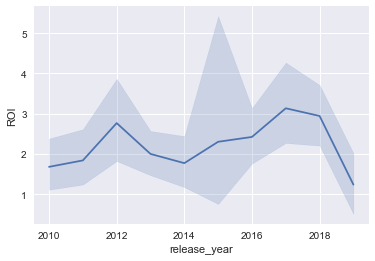

In [64]:
sns.lineplot(x="release_year", y="ROI", data=recent_movies_2010)
plt.show()

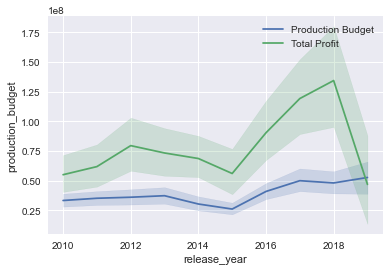

In [65]:
sns.lineplot(x="release_year", y="production_budget", data=recent_movies_2010, label="Production Budget")
sns.lineplot(x="release_year", y="total_profit", data=recent_movies_2010, label="Total Profit")
plt.show();

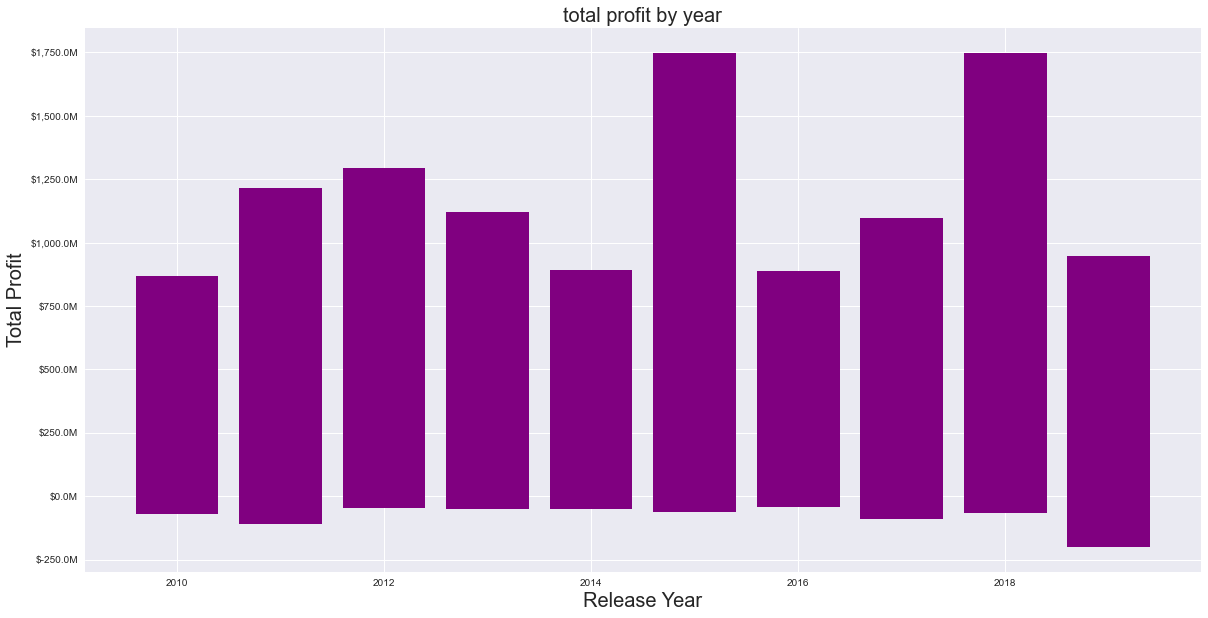

In [66]:
df = recent_movies_2010

# Set up plot
fig, ax = plt.subplots(figsize=(20,10))

# release year vs. profit
ax.bar(df["release_year"], df["total_profit"], color="purple")
ax.set_title("total profit by year", size=20)
ax.yaxis.set_major_formatter(price_fmt_mill)
ax.set_xlabel("Release Year", size=20)
ax.set_ylabel("Total Profit", size=20);

### VISUALIZATIONS FOR TOP MOVIES

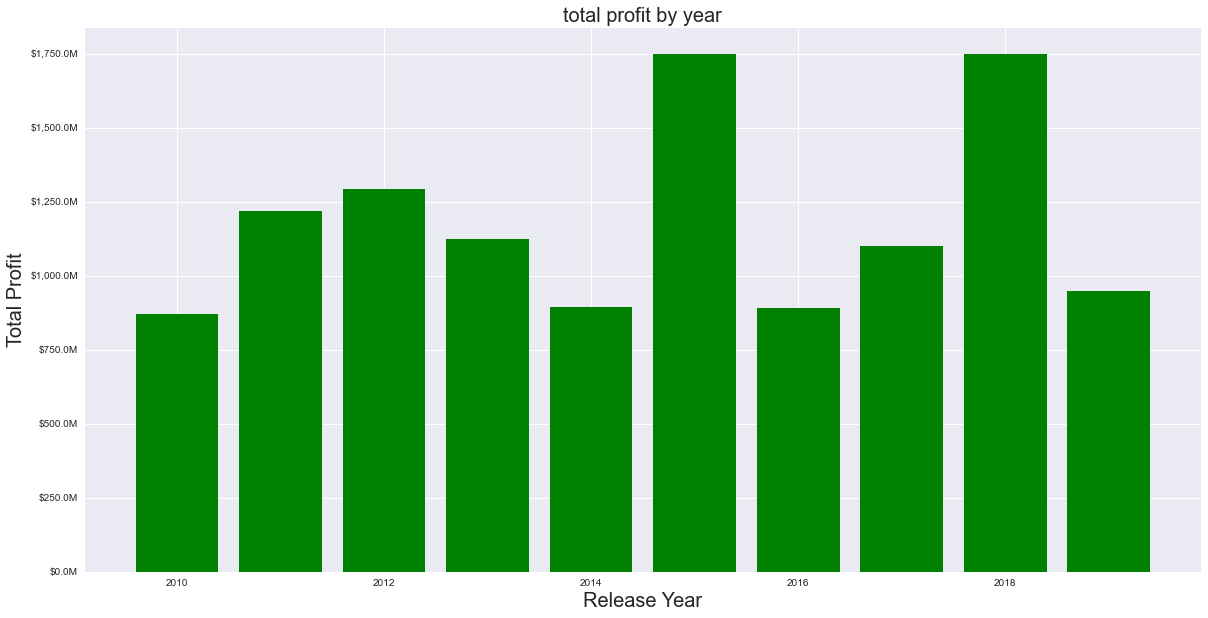

In [71]:
df = top_profit

# Set up plot
fig, ax = plt.subplots(figsize=(20,10))

# release year vs. profit
ax.bar(df["release_year"], df["total_profit"], color="green")
ax.set_title("total profit by year", size=20)
ax.yaxis.set_major_formatter(price_fmt_mill)
ax.set_xlabel("Release Year", size=20)
ax.set_ylabel("Total Profit", size=20);

### Analysis of the last 4 decades

In [68]:
movies_90s = project_analysis_df[project_analysis_df['release_year'] <= 1999]
movies_90s = movies_90s[movies_90s['release_year'] >= 1990]
movies_90s.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,826,826,826,826,109,109,98
mean,"1,996","30,586,882","57,474,338",4,6,"27,319",99
std,3,"28,269,010","135,438,258",21,1,"125,421",22
min,"1,990","6,000","-73,482,678",-1,2,5,50
25%,"1,994","9,400,000","-4,307,075",-0,5,20,85
50%,"1,997","22,500,000","9,111,116",1,6,108,98
75%,"1,998","45,000,000","65,034,926",3,7,851,113
max,"1,999","200,000,000","2,008,208,395",413,9,"1,183,655",167


**For 90s releases. On average:**
- Need to be in the top 50% to get a return on investement, however it is easier to break even. (first quartile)
- If in the top 50%, the median budget is 22.5 million, with a profit of 9 million.
- the IMDB ratings all see to be middle of the road, although the movies in the top quartile have a higher average. (barely)
- data is largely the same as the more recent data

In [69]:
movies_80s = project_analysis_df[project_analysis_df['release_year'] <= 1989]
movies_80s = movies_80s[movies_80s['release_year'] >= 1980]
movies_80s.describe()

,release_year,production_budget,total_profit,ROI,averagerating,numvotes,runtime_minutes
count,301,301,301,301,39,39,37
mean,"1,985","14,480,140","47,946,976",7,6,"38,019",101
std,3,"12,598,442","98,113,096",31,1,"75,887",20
min,"1,980","100,000","-41,591,364",-1,2,5,47
25%,"1,982","5,000,000","43,618",0,5,124,91
50%,"1,985","12,000,000","15,697,647",2,6,"1,299",100
75%,"1,987","20,000,000","47,715,416",6,7,"33,503",113
max,"1,989","70,000,000","782,465,326",498,9,"296,211",144


**For 80s releases. On average:**
- Need to be in the top 50% to get a return on investement, however it is easier to break even. (first quartile)
- If in the top 50%, the median budget is 12 million, with a profit of 15.5 million.
- the IMDB ratings all see to be middle of the road, although the movies in the top quartile have a higher average. (barely)
- data is largely the same as the more recent data

### Profit Analysis

**How do we determine what movies are the most successful?**
- Using the 2010-2019 dataset, I will slice out the **most successful** movies.
- The two metrics that I will be using are **total profit and return on investment (ROI)**
- I will then slice out the top 500 movies as that is roughly the top quartile for this dataset. 
- These movies would be good to emulate as we want to be as successful as possible.

In [110]:
#arranging the 2010 - 2019 movies by most profit and most ROI.
#profit_df= recent_movies_2010.sort_values('total_profit', ascending=False)
#roi_df = recent_movies_2010.sort_values('ROI', ascending=False)
#top_profit = profit_df[0:500]
#all_profit = profit_df[0:1250] #new variable as of 9/30
#top_roi = roi_df[0:500]

In [72]:
#movies that did not make a profit
#loss_df= recent_movies_2010.sort_values('total_profit', ascending=True)
#loss_df = loss_df[0:800]

In [73]:
#trying to make profit df apples to apples with loss df
#profit_df_2 = recent_movies_2010.sort_values('total_profit', ascending=False)
#profit_df_2 = profit_df_2[0:1000]

In [89]:
#loss_genre_df = genre_df(loss_df)
#loss_genre_df = loss_genre_df.reset_index()
#loss_genre_df = loss_genre_df.drop(loss_genre_df[['level_0','genre_1', 'genre_2', 'genre_3']], axis=1)
#loss_genre_df = loss_genre_df.sort_values('total', ascending=False)
#loss_genre_df

**INSERT VISUALIZATION OF PROFIT AND ROI**

### Preparing for Genre Analysis 

**What genres correspond to the most profitable movies as well as the movies with the best ROI?**
- I will use the 2010-2019 dataset for this analysis as it has the most complete genre information.

In [111]:
#arranging the 2010 - 2019 movies by most profit and most ROI.
profit_df= recent_movies_2010.sort_values('total_profit', ascending=False)
roi_df = recent_movies_2010.sort_values('ROI', ascending=False)
top_profit = profit_df[0:500]
all_profit = profit_df[0:1250] #new variable as of 9/30
top_roi = roi_df[0:500]

In [75]:
def genre_df(df): #function to get the value counts of the genre columns in a dataframe
    genre_df = df[['genre_1', 'genre_2' , 'genre_3']]
    genre_counts= genre_df.apply(pd.Series.value_counts)
    genre_df = genre_counts.fillna(0)
    genre_df['total'] = genre_counts.sum(axis=1)
    genre_df = genre_df.reset_index()
    return genre_df

In [88]:
#movies that did not make a profit
loss_df= recent_movies_2010.sort_values('total_profit', ascending=True)
loss_df = loss_df[0:800]

In [92]:
loss_genre_df = genre_df(loss_df)
loss_genre_df = loss_genre_df.reset_index()
loss_genre_df = loss_genre_df.drop(loss_genre_df[['level_0','genre_1', 'genre_2', 'genre_3']], axis=1)
loss_genre_df = loss_genre_df.sort_values('total', ascending=False)
loss_genre_df.head()

,index,total
7,Drama,340
4,Comedy,160
0,Action,147
19,Thriller,117
5,Crime,113


In [97]:
#Genre DF for ALL movies that are in genre_df_2010 
genre_df_2010 = genre_df(recent_movies_2010)
genre_df_2010 = genre_df_2010.drop(genre_df_2010[['genre_1', 'genre_2', 'genre_3']], axis=1)
genre_df_2010 = genre_df_2010.sort_values('total', ascending = False)
genre_df_2010

,index,total
7,Drama,895
4,Comedy,581
0,Action,483
1,Adventure,374
19,Thriller,316
5,Crime,268
11,Horror,231
16,Romance,218
17,Sci-Fi,152
3,Biography,150


In [81]:
#These are the genres from the 500 most profitable movies from 2010-2019
genre_df_profit = genre_df(top_profit)
genre_df_profit = genre_df_profit.sort_values('total', ascending=False)
genre_df_profit = genre_df_profit.drop(genre_df_profit[['genre_1', 'genre_2', 'genre_3']], axis=1)

genre_df_profit

,index,total
1,Adventure,198
0,Action,186
4,Comedy,155
7,Drama,128
16,Sci-Fi,68
18,Thriller,67
2,Animation,66
9,Fantasy,46
11,Horror,43
5,Crime,40


In [115]:
#function for determiningmsuccess rate

def success_rate_df(df):
    success_rate = df.apply(lambda x: x['Profit'] / x['Total'], axis=1)
    df['success_rate'] = success_rate
    df['success_rate'] = df['success_rate'].map("{:.2%}".format)
    df = df.sort_values('success_rate', ascending=False)

    
    



In [104]:
#Comparing genres of top 500 profitable movies from 2010 df with genres of movies that lost money.

genre_comparison_df = pd.merge(genre_df_profit, loss_genre_df, on='index', how='inner')
genre_comparison_df = genre_comparison_df.rename(columns={"total_x": "Profit", "total_y": "Loss"})
total_genre_count = genre_comparison_df.apply(lambda x: x['Profit'] + x['Loss'], axis=1)
genre_comparison_df['Total'] = total_genre_count
success_rate = genre_comparison_df.apply(lambda x: x['Profit'] / x['Total'], axis=1)
genre_comparison_df['success_rate'] = success_rate
genre_comparison_df['success_rate'] = genre_comparison_df['success_rate'].map("{:.2%}".format)
genre_comparison_df = genre_comparison_df.sort_values('success_rate', ascending=False)

genre_comparison_df

,index,Profit,Loss,Total,success_rate
6,Animation,66,16,82,80.49%
0,Adventure,198,71,269,73.61%
4,Sci-Fi,68,40,108,62.96%
7,Fantasy,46,32,78,58.97%
12,Family,32,25,57,56.14%
1,Action,186,147,333,55.86%
2,Comedy,155,160,315,49.21%
11,Mystery,35,45,80,43.75%
10,Romance,40,63,103,38.83%
5,Thriller,67,117,184,36.41%


In [122]:
#These are the genres from ALL profitable movies from 2010-2019
genre_df_all_profit = genre_df(all_profit)
genre_df_all_profit = genre_df_all_profit.sort_values('total', ascending=False)
genre_df_all_profit = genre_df_all_profit.drop(genre_df_all_profit[['genre_1', 'genre_2', 'genre_3']], axis=1)

genre_df_all_profit.head(3)

,index,total
7,Drama,484
4,Comedy,392
0,Action,327


In [121]:
#Comparing genres of ALL profitable movies from 2010 df with genres of movies that lost money.

genre_comparison_df_2 = pd.merge(genre_df_all_profit, loss_genre_df, on='index', how='inner')
genre_comparison_df_2 = genre_comparison_df_2.rename(columns={"total_x": "Profit", "total_y": "Loss"})
total_genre_count_2 = genre_comparison_df_2.apply(lambda x: x['Profit'] + x['Loss'], axis=1)
genre_comparison_df_2['Total'] = total_genre_count_2

success_rate_df(genre_comparison_df_2)
genre_comparison_df_2 = genre_comparison_df_2.sort_values('success_rate',ascending=False)
genre_comparison_df_2

,index,Profit,Loss,Total,success_rate
11,Animation,92,16,108,85.19%
3,Adventure,297,71,368,80.71%
9,Fantasy,96,32,128,75.00%
13,Family,73,25,98,74.49%
8,Sci-Fi,103,40,143,72.03%
1,Comedy,392,160,552,71.01%
14,Music,36,16,52,69.23%
5,Romance,141,63,204,69.12%
2,Action,327,147,474,68.99%
10,Mystery,95,45,140,67.86%


### Genre comparison - CRITICAL!

In [ ]:
#genre_df_profit_2 = genre_df(profit_df_2)
#genre_df_profit_2 = genre_df_profit_2.sort_values('total', ascending=False)
#genre_df_profit_2

In [ ]:
#comparison with profit_df_2

#genre_comparison_df_2 = pd.merge(genre_df_profit_2, loss_genre_df, on='index', how='inner')
#genre_comparison_df_2 = genre_comparison_df_2.drop(genre_comparison_df_2[['genre_1_x', 'genre_2_x',
                                                                   #'genre_3_x', 'genre_1_y', 'genre_2_y',
                                                                   #'genre_3_y']], axis=1)
#genre_comparison_df_2 = genre_comparison_df_2.rename(columns={"total_x": "Profit", "total_y": "Loss"})
#genre_comparison_df_2
  


In [ ]:
#difference_2 = genre_comparison_df_2.apply(lambda x: x['Profit'] - x['Loss'], axis=1)
#genre_comparison_df_2['Difference_2'] = difference_2
#genre_comparison_df_2 = genre_comparison_df_2.sort_values('Difference_2', ascending=False)
#genre_comparison_df_2


In [ ]:
#genre_comparison_df_2 = genre_comparison_df_2.drop(['Difference'], axis=1)
#genre_comparison_df_2

In [ ]:
#total_genre_count = genre_comparison_df_2.apply(lambda x: x['Profit'] + x['Loss'], axis=1)
#genre_comparison_df_2['Total'] = total_genre_count
#genre_comparison_df_2

In [ ]:
#success_rate = genre_comparison_df_2.apply(lambda x: x['Profit'] / x['Total'], axis=1)
#genre_comparison_df_2['success_rate'] = success_rate
#genre_comparison_df_2

In [ ]:
#genre_comparison_df_2
#genre_comparison_df_2['success_rate'] = genre_comparison_df_2['success_rate'].map("{:.2%}".format)
#genre_comparison_df_2

In [ ]:
#df = genre_comparison_df_2

#success_rate_2 = (df['Profit'] / df['Total'])
#df['success_rate_2'] = success_rate_2
#df

In [ ]:
#comparing_dfs = pd.merge(genre_comparison_df, genre_comparison_df_2, on='index', how='inner')
#comparing_dfs = comparing_dfs.drop(comparing_dfs[['Profit_x', 'Profit_y',
                                                                   #'Loss_x', 'Loss_y', ]], axis=1)
#comparing_dfs = comparing_dfs.drop(comparing_dfs[['level_0_x', 'level_0_y',
                                                                    #]], axis=1)
#comparing_dfs


In [ ]:
#Comparing successful genres with genres of movies that lost money.

#genre_comparison_df = pd.merge(genre_df_profit, loss_genre_df, on='index', how='inner')
#genre_comparison_df = genre_comparison_df.drop(genre_comparison_df[['genre_1_x', 'genre_2_x',
                                                                   #'genre_3_x', 'genre_1_y', 'genre_2_y',
                                                                   #'genre_3_y']], axis=1)
#genre_comparison_df = genre_comparison_df.rename(columns={"total_x": "Profit", "total_y": "Loss"})
#genre_comparison_df

In [ ]:
# This should be redundant now
#genre_comparison_df = genre_comparison_df.rename(columns={"total_x": "Profit", "total_y": "Loss"})
#genre_comparison_df

In [ ]:
#difference = genre_comparison_df.apply(lambda x: x['Profit'] - x['Loss'], axis=1)
#genre_comparison_df['Difference'] = difference
#genre_comparison_df


In [ ]:
#genre_comparison_df = genre_comparison_df.sort_values('Difference', ascending=False)
#genre_comparison_df

In [ ]:
#genre_comparison_df

#total_genre_count = genre_comparison_df.apply(lambda x: x['Profit'] + x['Loss'], axis=1)
#genre_comparison_df['Total'] = total_genre_count

#success_rate = (genre_comparison_df['Profit'] / genre_comparison_df['Total'])
#genre_comparison_df['success_rate_1'] = success_rate

#genre_comparison_df

In [129]:
#These are the genres from the 500 movies with the best ROI from 2010-2019
genre_df_roi = genre_df(top_roi)
genre_df_roi = genre_df_roi.sort_values('total', ascending=False)
genre_df_roi = genre_df_roi.drop(genre_df_roi[['genre_1', 'genre_2', 'genre_3']], axis=1)
genre_df_roi

,index,total
7,Drama,199
4,Comedy,149
0,Action,100
1,Adventure,98
18,Thriller,76
11,Horror,75
14,Mystery,60
15,Romance,59
16,Sci-Fi,46
3,Biography,38


In [126]:
#resetting the indexes so that I can merge them
genre_df_roi = genre_df_roi.reset_index()
genre_df_profit = genre_df_profit.reset_index()


In [133]:
genre_df_merged = pd.merge(genre_df_profit, genre_df_roi, on= 'index', how='left')
genre_df_merged = genre_df_merged.rename(columns={'total_x': 'profit_genres', 'total_y': 'roi_genres'})
genre_df_merged.sort_values('roi_genres', ascending=False)

,level_0,index,profit_genres,roi_genres
3,7,Drama,128,199
2,4,Comedy,155,149
1,0,Action,186,100
0,1,Adventure,198,98
5,18,Thriller,67,76
8,11,Horror,43,75
11,14,Mystery,35,60
10,15,Romance,40,59
4,16,Sci-Fi,68,46
13,3,Biography,29,38


In [128]:
#drop the extra columns.
genre_df_merged = genre_df_merged.drop(['genre_1_x', 'genre_2_x', 'genre_3_x',
                                         'genre_1_y', 'genre_2_y', 'genre_3_y'], axis=1)

#re-label the two columns that I am keeping.
genre_df_merged = genre_df_merged.rename(columns={'total_x': 'profit_genres', 'total_y': 'roi_genres'})

#get the total for each genre and sort from most to least.
genre_df_merged['Total'] = genre_df_merged.apply(lambda x: x['profit_genres'] + x['roi_genres'], axis=1)
genre_df_merged = genre_df_merged.sort_values('Total', ascending = False)
genre_df_merged

KeyError: "['genre_1_x' 'genre_2_x' 'genre_3_x' 'genre_1_y' 'genre_2_y' 'genre_3_y'] not found in axis"

In [ ]:
genre_df_merged.sort_values('roi_genres', ascending=False)

### Genre Analysis

**GENRE ANALYSIS GOES HERE**

#### Genre Visualization

In [ ]:
df =genre_df_merged

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['Total'])

ax.set_xlabel('Genre Types')
ax.set_ylabel('Number of Movies')
ax.set_title('Genre Types Among Top Movies');


In [ ]:
#attempting to show roi and profit
df =genre_df_merged

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['profit_genres'], color='gold')
ax.bar(x=df['index'], height=df['roi_genres'], color='purple')


ax.set_xlabel('Genre Types')
ax.set_ylabel('Number of Movies')
ax.set_title('Genre Types Among Top 500 Movies');


### Budget Analysis

**How much does Microsoft need to spend on these movies?**

In [ ]:
roi_budget_df = top_roi.sort_values('production_budget', ascending=True)
low_budget_roi = roi_budget_df[0:150] #the 150 lowest budget movies in the top 500 ROI

high_budget_roi = roi_budget_df.sort_values('production_budget', ascending=False)
high_budget_roi = high_budget_roi[0:150] #the 150 highest budget movies in the top 500 ROI




In [ ]:
low_budget_roi.head(150)

In [ ]:
low_budget_roi.describe()

In [ ]:
high_budget_roi.head(150)

In [ ]:
high_budget_roi.describe()

#### Genres by Budget

In [ ]:
#These are the genres for the 150 highest budget movies out of the top 500 ROI
high_budget_genres = genre_df(high_budget_roi)
high_budget_genres = high_budget_genres.reset_index()
high_budget_genres.sort_values('total', ascending=False)

In [ ]:
low_budget_roi.describe()

In [ ]:
#These are the genres for the 150 lowest budget movies out of the top 500 ROI
low_budget_genres = genre_df(low_budget_roi)
low_budget_genres.sort_values('total', ascending=False)

## Visualization Archive

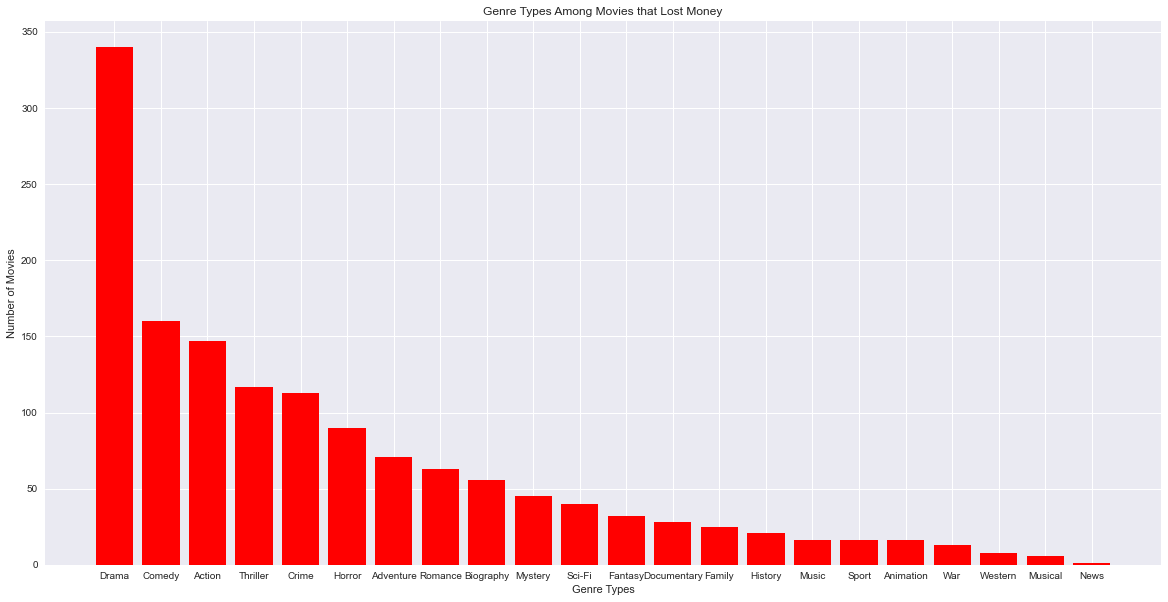

In [93]:
#GENRE TYPES AMONG MOVIES THAT LOST MONEY
df = loss_genre_df

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['total'], color='red')


ax.set_xlabel('Genre Types')
ax.set_ylabel('Number of Movies')
ax.set_title('Genre Types Among Movies that Lost Money');


In [ ]:
#Visualization for genre comparison dataframes. Doesn't work because i got rid of Difference column.

df = genre_comparison_df

fig, ax = plt.subplots(figsize = (20,10))

ax.bar(x=df['index'], height=df['difference'],  color=(df['difference'] >= .50).map({True: 'g',
                                                    False: 'r'}))


ax.set_xlabel('Genre Types', size=20)
ax.set_ylabel('Number of Movies', size=20)
ax.set_title('Genre Types Among Movies', size=20);


## ARCHIVE

In [ ]:

#low_budget = budget_df[0:100]
#low_budget

In [ ]:
#These are the genres for the 100 lowest budget movies out of the top 325 ROI
#low_budget_genres = genre_df(low_budget)
#low_budget_genres.sort_values('total', ascending=False)

In [ ]:
#high_budget_2010_roi = budget_df.sort_values('production_budget', ascending=False)
#high_budget_2010_roi = high_budget_2010_roi[0:100]


In [ ]:
#low_budget_2010 = recent_movies_2010.sort_values('production_budget', ascending=True)
#low_budget_2010.head(500)

In [ ]:
#attempting to get data on budgets related to genre
#test_df = recent_movies_2010.sort_values('genre_1', ascending=True)
#test_df.head(100)

In [ ]:
#action_movies = recent_movies_2010[recent_movies_2010['genre_1'] == 'Action']
#action_movies

In [ ]:
#horror_1 = recent_movies_2010[recent_movies_2010['genre_1'] == 'Horror']
#horror_2 = recent_movies_2010[recent_movies_2010['genre_2'] == 'Horror']
#horror_3 =  recent_movies_2010[recent_movies_2010['genre_3'] == 'Horror']
#horror_df = horror_1.append([[horror_2, horror_3]])                     

In [ ]:
#is there a coorelation between genre and performance?
#budget and genre?

In [ ]:
#merged_rt_df_2 = merged_rt_df

In [ ]:
#merged_rt_df['runtime'].isna().sum()

In [ ]:
#corrected_runtime = merged_rt_df_2['runtime'].fillna(0)

In [ ]:
#corrected_runtime

In [ ]:
#corrected_runtime_2 = corrected_runtime.str[:3]
#corrected_runtime_2

In [ ]:
#corrected_runtime_2.isna().sum()

In [ ]:
#corrected_runtime_3 = corrected_runtime_2.fillna(0)

In [ ]:
#corrected_runtime_3.value_counts()

In [ ]:
#merged_rt_df_2['runtime'] = corrected_runtime_3

In [ ]:
#merged_rt_df_2.info()

In [ ]:
#merged_rt_df_2 = merged_rt_df_2.drop('box_office', axis=1)
#merged_rt_df_2.head(10)

In [ ]:
#merged_rt_df_2['runtime'].isna().sum()



In [ ]:
#droping null values so I can convert the reamining ones to float.
#merged_rt_df_2['runtime'].dropna(NaN)

In [ ]:
#cleaned_runtime = merged_rt_df_2['runtime'].str[:3]
#cleaned_runtime.tail(5)

In [ ]:
#cleaned_theater_date = pd.to_datetime(merged_rt_df_2['theater_date'])
#cleaned_theater_date

In [ ]:
#merged_rt_df_2["theater_date"] = cleaned_theater_date
#merged_rt_df_2

In [ ]:
#df = merged_rt_df_2

In [ ]:
#duplicates = df[df.duplicated()]
#print(len(duplicates))
#duplicates.head()


In [ ]:
#rt_duplicates = merged_rt_df_2[[merged_rt_df_2['id']].duplicated]



In [ ]:
#merged_rt_df_2.info()

In [ ]:
#merged_df_2.info()

In [ ]:
#merged_rt_df['runtime'][299]

In [ ]:
merged_rt_df.sort_values('theater_date', ascending=False).head(100)

In [ ]:
merged_rt_df

In [ ]:
# Here you run your code to clean the data

## Data Analysis
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

###  What I did.

There were two main components of data that I was interested in. The first was Financial data, specificially, how much
did it cost to make the movie and how much money did it make at the box office. The second was information on what genre (or genres) the best performing movies had.

The Numbers dataset had the financial information that I needed. I was able to use the provided production budget and worldwide gross to calculate the total profit or loss for each movie. 

I then merged all the IMDB datasets into a master data set using the IMDB ID (tconst) as a primary key. There was a lot of extra data there that I didn't end up using, but it did provide the primary title and orginial title, which I could use to link to The Numbers.

### Limitations of the data:

Most of the genre data that I have is from 2010 - 2019. While I would have liked to have consistent genre data for all of the movies, this data is from the most relevant movies for answering the business problem. Microsoft wants data on what types of movies are performing well NOW, so this data was very valuable. I was still able to get financial data for movies from previous years, so it all worked to paint a good picture of the movie industry.

### Challenges along the way (and how I dealt with them):

The biggest challenge that I faced was merging the IMDB data with data from The Numbers. While both provided titles for each movie, there was a little descrepency with some more common titles. Most notably, Avatar, the highest grossing movie in the dataset, was being linked with a low budget horror movie of the same name. I was able to correctly merge the data by using both the primary title and original title from IMDB to determine which was correct. Also, dropping duplicates resolved a lot of the problems.

Another challenge was that the genre field on the IMDB dataset had up to 3 genres all contained together in one string, making it hard to search the data. I was able to create a function which seperated this string into 3 seperate genre fields, as well counting the occurances of each genre through value counts.

## Questions that I want to answer:
    
    1) What are the genres of the movies that made the most profit?
    2) What are the genres of the movies with the best ROI?
    3) How much money do you need to spend to make these movies?
    4) Maybe look at directors/studios/etc?

Findings from Analysis:



**Recommendations:**
    1. 

## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***